# Examples for Scipy introduction

This is a collection of examples for introductory Scipy. See the [Scipy page](scipy) for the main introduction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp

In [2]:
# Machinery to store outputs for later use.
# This is for rendering in the Jupyter Book version of these pages.
from myst_nb import glue

(optimize-example1)=

## Finding the minimum of a smooth function

<!--- plot_optimize_example1 -->

Demos various methods to find the minimum of a function.

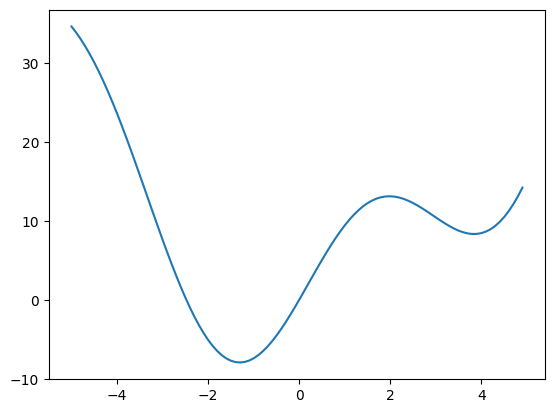

In [3]:
def f(x):
    return x**2 + 10 * np.sin(x)

x = np.arange(-5, 5, 0.1)
plt.plot(x, f(x));

In [4]:
# Now find the minimum with a few methods
# The default (Nelder Mead)
print(sp.optimize.minimize(f, x0=0))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -7.945823375615215
        x: [-1.306e+00]
      nit: 5
      jac: [-1.192e-06]
 hess_inv: [[ 8.589e-02]]
     nfev: 12
     njev: 6


## Other examples

(connect-measurements)=

### connect_measurements

<!--- plot_connect_measurements -->

Demo connected components

Extracting and labeling connected components in a 2D array

In [5]:
# Generate some binary data
x, y = np.indices((100, 100))
sig = (
    np.sin(2 * np.pi * x / 50.0)
    * np.sin(2 * np.pi * y / 50.0)
    * (1 + x * y / 50.0**2) ** 2
)
mask = sig > 1

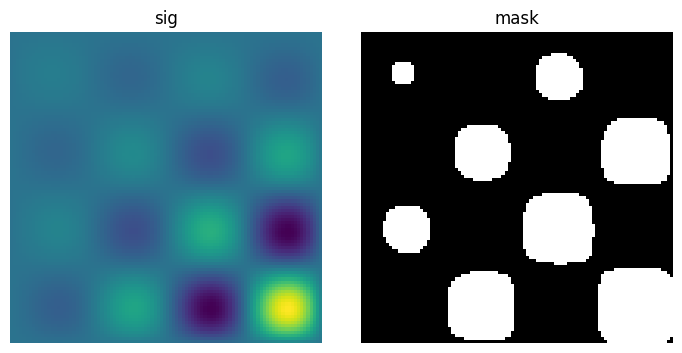

In [6]:
plt.figure(figsize=(7, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(sig)
plt.axis("off")
plt.title("sig")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("mask")
plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.9);

Label connected components

In [7]:
labels, nb = sp.ndimage.label(mask)

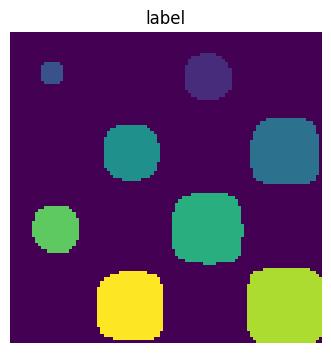

In [8]:
plt.figure(figsize=(3.5, 3.5))
plt.imshow(labels)
plt.title("label")
plt.axis("off")
plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.9);

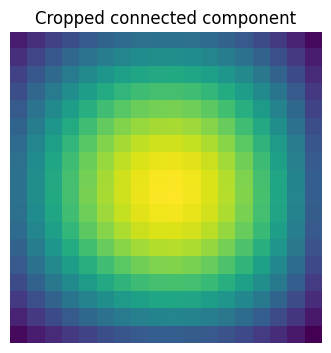

In [9]:
# Extract the 4th connected component, and crop the array around it
sl = sp.ndimage.find_objects(labels == 4)
plt.figure(figsize=(3.5, 3.5))
plt.imshow(sig[sl[0]])
plt.title("Cropped connected component")
plt.axis("off")
plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.9);

(image-filters)=

### image_filters

<!--- plot_image_filters -->

Plot filtering on images

Demo filtering for denoising of images.

In [10]:
# Load some data
face = sp.datasets.face(gray=True)
face = face[:512, -512:]  # crop out square on right

In [11]:
# Apply a variety of filters
noisy_face = np.copy(face).astype(float)
rng = np.random.default_rng()
noisy_face += face.std() * 0.5 * rng.standard_normal(face.shape)
blurred_face = sp.ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = sp.ndimage.median_filter(noisy_face, size=5)
wiener_face = sp.signal.wiener(noisy_face, (5, 5))

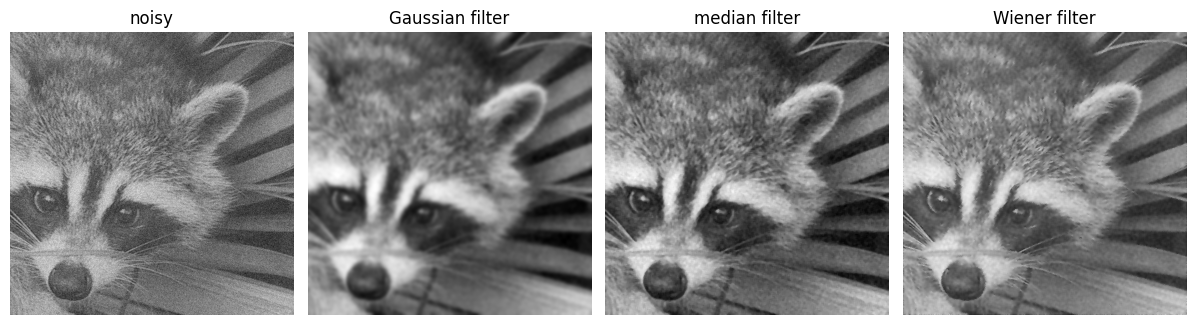

In [12]:
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap="gray")
plt.axis("off")
plt.title("noisy")
plt.subplot(142)
plt.imshow(blurred_face, cmap="gray")
plt.axis("off")
plt.title("Gaussian filter")
plt.subplot(143)
plt.imshow(median_face, cmap="gray")
plt.axis("off")
plt.title("median filter")
plt.subplot(144)
plt.imshow(wiener_face, cmap="gray")
plt.title("Wiener filter")
plt.axis("off")
plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.99);

(image-transform)=

### image_transform

<!--- plot_image_transform -->

Plot geometrical transformations on images

Demo geometrical transformations of images.

In [13]:
# Load some data
face = sp.datasets.face(gray=True)

# Apply a variety of transformations
shifted_face = sp.ndimage.shift(face, (50, 50))
shifted_face2 = sp.ndimage.shift(face, (50, 50), mode="nearest")
rotated_face = sp.ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = sp.ndimage.zoom(face, 2)
zoomed_face.shape

(1536, 2048)

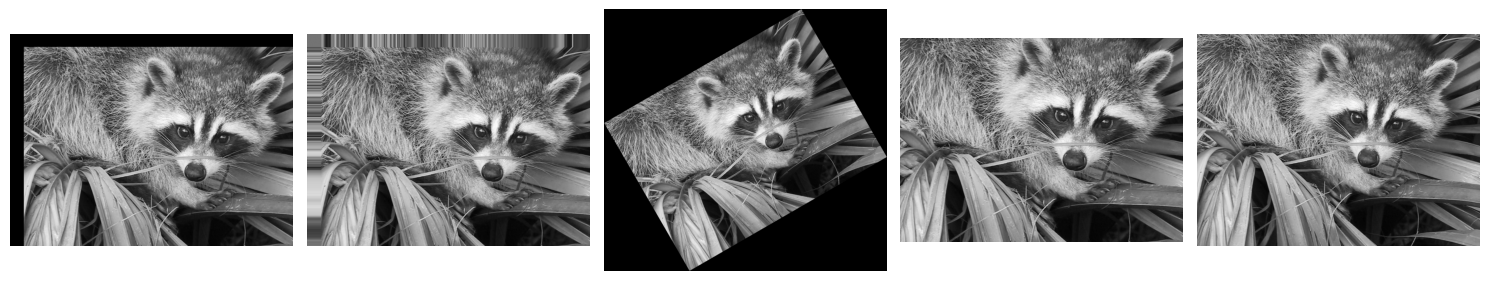

In [14]:
plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap="gray")
plt.axis("off")
plt.subplot(152)
plt.imshow(shifted_face2, cmap="gray")
plt.axis("off")
plt.subplot(153)
plt.imshow(rotated_face, cmap="gray")
plt.axis("off")
plt.subplot(154)
plt.imshow(cropped_face, cmap="gray")
plt.axis("off")
plt.subplot(155)
plt.imshow(zoomed_face, cmap="gray")
plt.axis("off")
plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.99);

(mathematical-morpho)=

### Mathematical morphology

<!--- plot_mathematical_morpho -->

Demo mathematical morphology

A basic demo of binary opening and closing.

In [15]:
# Generate some binary data
rng = np.random.default_rng(0)
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * rng.standard_normal(a.shape)
mask = a >= 0.5

In [16]:
# Apply mathematical morphology
opened_mask = sp.ndimage.binary_opening(mask)
closed_mask = sp.ndimage.binary_closing(opened_mask)

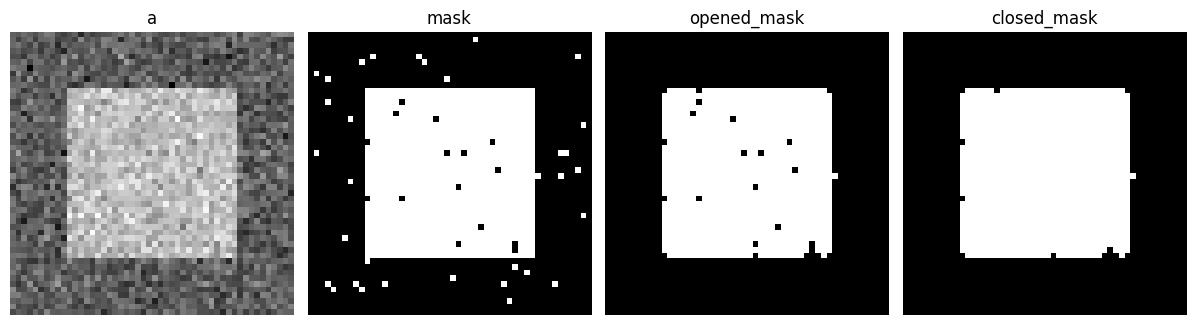

In [17]:
# Plot
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(a, cmap="gray")
plt.axis("off")
plt.title("a")
plt.subplot(142)
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("mask")
plt.subplot(143)
plt.imshow(opened_mask, cmap="gray")
plt.axis("off")
plt.title("opened_mask")
plt.subplot(144)
plt.imshow(closed_mask, cmap="gray")
plt.title("closed_mask")
plt.axis("off")
plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.99);

(optimize-example2)=

### optimize_example2

<!--- plot_optimize_example2 -->

Minima and roots of a function

Demos finding minima and roots of a function.

Define the function:

In [18]:
x = np.arange(-10, 10, 0.1)

def f(x):
    return x**2 + 10 * np.sin(x)

Find minima:

In [19]:
# Global optimization
grid = (-10, 10, 0.1)
xmin_global = sp.optimize.brute(f, (grid,))
print(f"Global minima found {xmin_global}")

Global minima found [-1.30641113]


In [20]:
# Constrain optimization
xmin_local = sp.optimize.fminbound(f, 0, 10)
print(f"Local minimum found {xmin_local}")

Local minimum found 3.8374671194983834


Root finding

In [21]:
root = sp.optimize.root(f, 1)  # our initial guess is 1
print(f"First root found {root.x}")
root2 = sp.optimize.root(f, -2.5)
print(f"Second root found {root2.x}")

First root found [0.]
Second root found [-2.47948183]


Plot function, minima, and roots

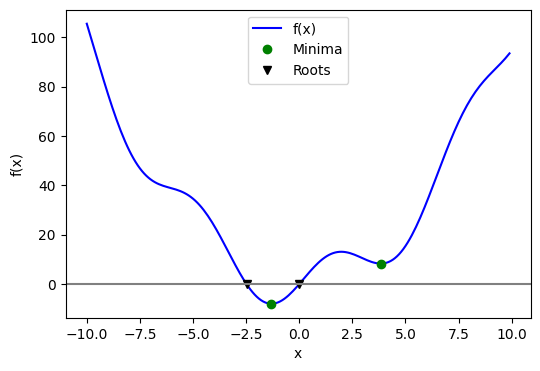

In [22]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
# Plot the function
ax.plot(x, f(x), "b-", label="f(x)")
# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), "go", label="Minima")
# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), "kv", label="Roots")
# Decorate the figure
ax.legend(loc="best")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.axhline(0, color="gray");

(scipy-fft-example)=

### Plotting and manipulating FFTs for filtering

Plot the power of the FFT of a signal and inverse FFT back to reconstruct
a signal.

This example demonstrates {func}`scipy.fft.fft`, {func}`scipy.fft.fftfreq` and
{func}`scipy.fft.ifft`. It implements a basic filter that is very suboptimal,
and should not be used.

#### Generate the signal

In [23]:
# Seed the random number generator
rng = np.random.default_rng(27446968)

time_step = 0.02
period = 5.0

time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * rng.normal(size=time_vec.size)

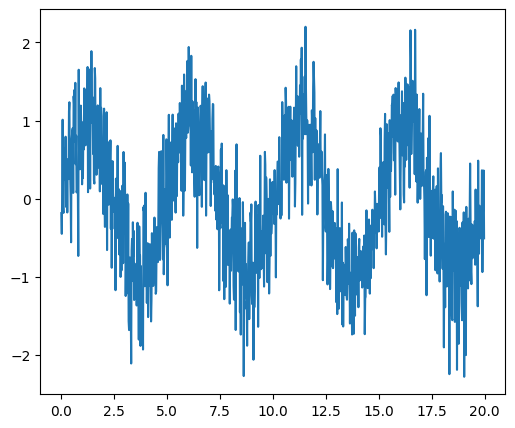

In [24]:
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label="Original signal")

# Store the figure for the book pages.
glue('original_signal_fig', plt.gcf(), display=False)

#### Compute and plot the power

In [25]:
# The FFT of the signal
sig_fft = sp.fft.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft) ** 2

# The corresponding frequencies
sample_freq = sp.fft.fftfreq(sig.size, d=time_step)

#### Find the peak frequency

We can focus on only the positive frequencies.

In [26]:
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

Check that the found peak frequency does indeed correspond to the frequency
that we generate the signal with:

In [27]:
np.allclose(peak_freq, 1.0 / period)

True

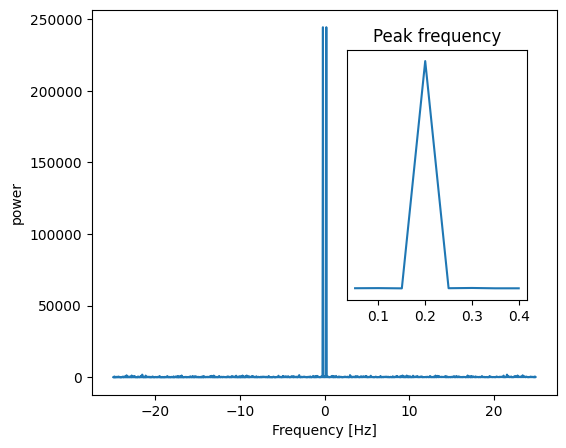

In [28]:
# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel("Frequency [Hz]")
plt.ylabel("power")
# An inner plot to show the peak frequency
axes = plt.axes((0.55, 0.3, 0.3, 0.5))
plt.title("Peak frequency")
plt.plot(freqs[:8], power[pos_mask][:8])
plt.setp(axes, yticks=[])

# Store the figure for the book pages.
glue('fft_of_signal_fig', plt.gcf(), display=False)

`scipy.signal.find_peaks_cwt` can also be used for more advanced peak
detection.

#### Remove all the high frequencies

We now remove all the high frequencies and transform back from frequencies to
signal.

In [29]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = sp.fft.ifft(high_freq_fft)

/Users/mb312/.virtualenvs/sp-lectures/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/mb312/.virtualenvs/sp-lectures/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


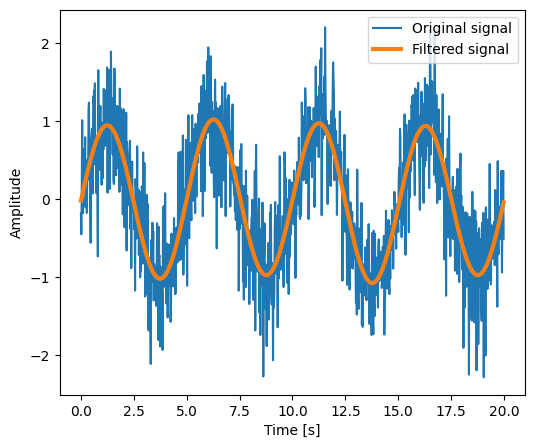

In [30]:
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label="Original signal")
plt.plot(time_vec, filtered_sig, linewidth=3, label="Filtered signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend(loc="best")

# Store the figure for the book pages.
glue('fft_filter_fig', plt.gcf(), display=False)

**Note** This is actually a bad way of creating a filter: such a brutal
cut-off in frequency space does not control distortion on the signal.

Filters should be created using the SciPy filter design code.

(scipy-spectrogram-example)=

### Spectrogram, power spectral density

<!--- plot_spectrogram -->

Demo spectrogram and power spectral density on a frequency chirp.

Generate a chirp signal:

In [31]:
# Seed the random number generator
np.random.seed(0)

In [32]:
time_step = 0.01
time_vec = np.arange(0, 70, time_step)

# A signal with a small frequency chirp
sig = np.sin(0.5 * np.pi * time_vec * (1 + 0.1 * time_vec))

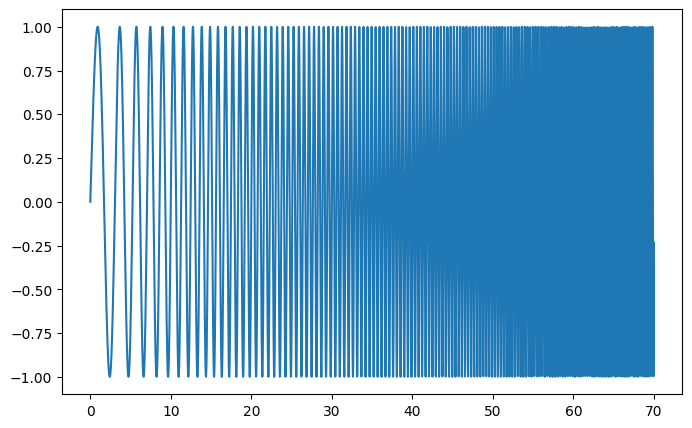

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(time_vec, sig)

# Store the figure for the book pages.
glue('chirp_fig', plt.gcf(), display=False)

Compute and plot the spectrogram

The spectrum of the signal on consecutive time windows

In [34]:
freqs, times, spectrogram = sp.signal.spectrogram(sig)

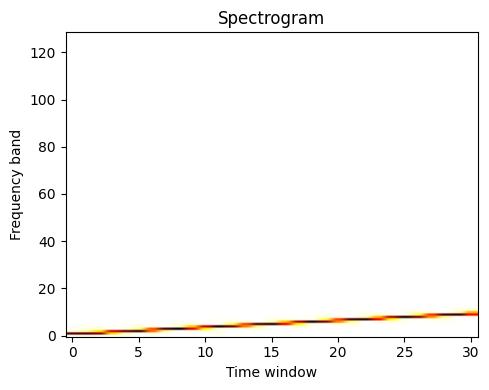

In [35]:
plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect="auto", cmap="hot_r", origin="lower")
plt.title("Spectrogram")
plt.ylabel("Frequency band")
plt.xlabel("Time window")
plt.tight_layout();

# Store the figure for the book pages.
glue('spectrogram_fig', plt.gcf(), display=False)

Next we compute and plot the power spectral density (PSD)

The power of the signal per frequency band:

In [36]:
freqs, psd = sp.signal.welch(sig)

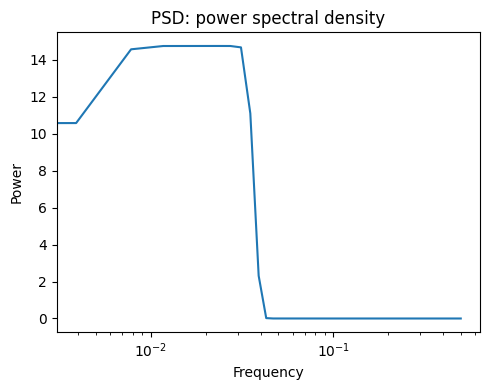

In [37]:
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title("PSD: power spectral density")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.tight_layout();
# Store the figure for the book pages.
glue('psd_fig', plt.gcf(), display=False)

(t-test)=

### t_test

<!--- plot_t_test -->

Comparing 2 sets of samples from Gaussians

In [38]:
# Generates 2 sets of observations
rng = np.random.default_rng(27446968)
samples1 = rng.normal(0, size=1000)
samples2 = rng.normal(1, size=1000)

In [39]:
# Compute a histogram of the sample
bins = np.linspace(-4, 4, 30)
histogram1, bins = np.histogram(samples1, bins=bins, density=True)
histogram2, bins = np.histogram(samples2, bins=bins, density=True)

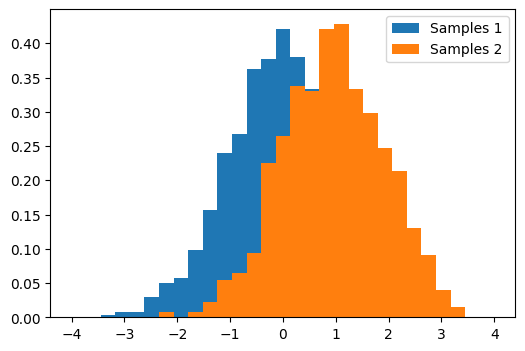

In [40]:
plt.figure(figsize=(6, 4))
plt.hist(samples1, bins=bins, density=True, label="Samples 1")  # type: ignore[arg-type]
plt.hist(samples2, bins=bins, density=True, label="Samples 2")  # type: ignore[arg-type]
plt.legend(loc="best");

(eg-image-blur)=

### Simple image blur by convolution with a Gaussian kernel

<!--- plot_image_blur -->

Blur an image ({download}`data/elephant.png`) using a
Gaussian kernel.

Convolution is easy to perform with FFT: convolving two signals boils
down to multiplying their FFTs (and performing an inverse FFT).

The original image:

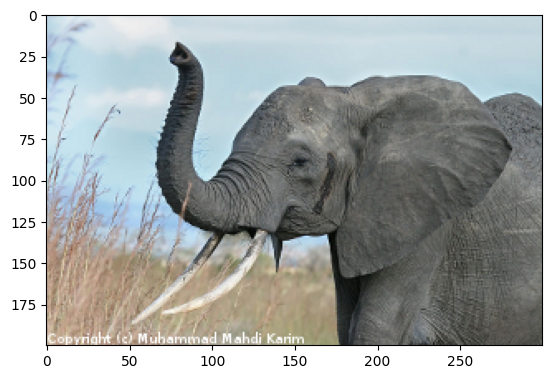

In [41]:
# read image
img = plt.imread("data/elephant.png")
plt.figure()
plt.imshow(img);

Prepare an Gaussian convolution kernel

In [42]:
# First a 1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1 * t**2)
bump /= np.trapezoid(bump)  # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

Implement convolution via FFT

In [43]:
# Padded Fourier transform, with the same shape as the image
# We use {func}`scipy.fft.fft2` to have a 2D FFT
kernel_ft = sp.fft.fft2(kernel, s=img.shape[:2], axes=(0, 1))

# convolve
img_ft = sp.fft.fft2(img, axes=(0, 1))

# the 'newaxis' is to match to color direction
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = sp.fft.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

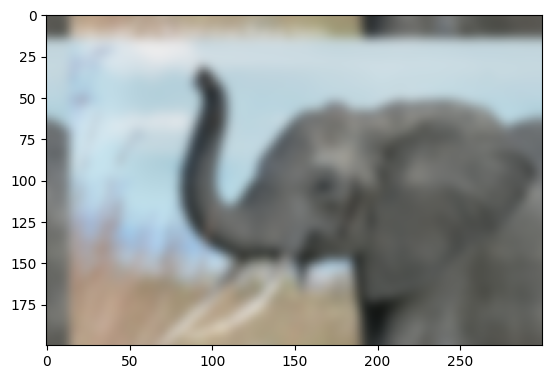

In [44]:
# plot output
plt.figure()
plt.imshow(img2);

# Store figure for use in main page.
glue("blur_fig", plt.gcf(), display=False)

Further exercise (only if you are familiar with this stuff):

A "wrapped border" appears in the upper left and top edges of the
image. This is because the padding is not done correctly, and does
not take the kernel size into account (so the convolution "flows out
of bounds of the image"). Try to remove this artifact.

A function to do it: {func}`scipy.signal.fftconvolve`

The above exercise was only for didactic reasons: there exists a
function in Scipy that will do this for us, and probably do a better
job: {func}`scipy.signal.fftconvolve`

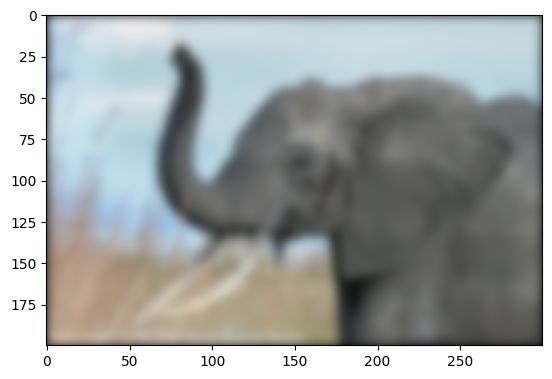

In [45]:
# mode='same' is there to enforce the same output shape as input arrays
# (ie avoid border effects).
img3 = sp.signal.fftconvolve(img, kernel[:, :, np.newaxis], mode="same")
plt.figure()
plt.imshow(img3);

Note that we still have a decay to zero at the border of the image.
Using {func}`scipy.ndimage.gaussian_filter` would get rid of this
artifact.

(eg-periodicity-finder)=

### Crude periodicity finding

<!--- plot_periodicity_finder -->

Discover the periods in evolution of animal populations
({download}`data/populations.txt`)

Load the data:

In [46]:
data = np.loadtxt("data/populations.txt")
years = data[:, 0]
populations = data[:, 1:]

Plot the data:

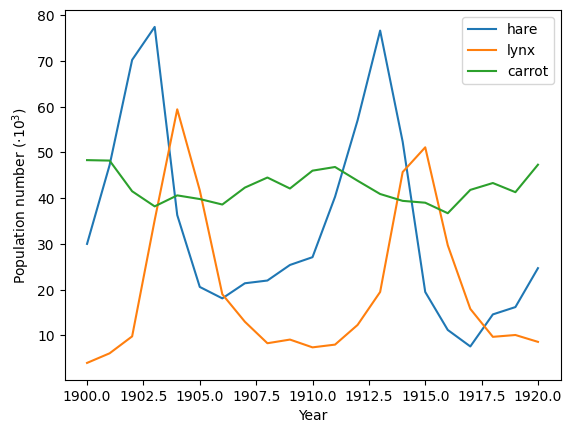

In [47]:
plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel("Year")
plt.ylabel(r"Population number ($\cdot10^3$)")
plt.legend(["hare", "lynx", "carrot"], loc=1);

# Store figure for use in main page.
glue("periodicity_fig", plt.gcf(), display=False)

In [48]:
# Plot its periods
ft_populations = sp.fft.fft(populations, axis=0)
frequencies = sp.fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_69605/2995045604.py:4: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


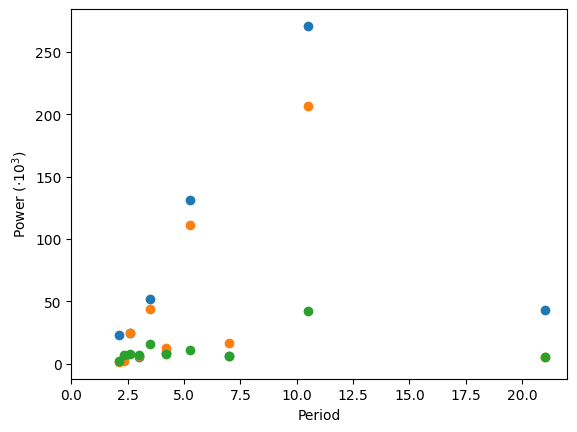

In [49]:
plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, "o")
plt.xlim(0, 22)
plt.xlabel("Period")
plt.ylabel(r"Power ($\cdot10^3$)");

There's probably a period of around 10 years (obvious from the
plot), but for this crude a method, there's not enough data to say
much more.